# Example code for OSL Learning
We will use the

In [1]:
import torch

import matplotlib.pyplot as plt

from datasets.openml_datasets import OpenML_Dataset
from datasets.torch_datasets import Torch_Dataset
from utils.weakener import Weakener
from models.model import MLP
from utils.losses import PartialLoss,CELoss,BrierLoss,LBLoss,EMLoss
from utils.trainig_testing import train_model,evaluate_model,train_and_evaluate

The steps you might want to take for running the full 'weakening - learning - evaluating' experience
<ol>
<li> Loading the clean dataset: <code>Data = OpemML_Dataset('name')</code></li>
<li> Setting the Weakener class: <code>Weak = Weakener(Data.num_classes)</code></li>
<ol>
<li> Generate the mixing matrix: <code>WL.generate_M(model_class='pll')</code></li>
<li> Generate the weak labels <em>(z=index,w=one_hot)</em>: <code>z, w = WL.generate_weak(train_y)</code></li>
<ul style="list-style: none;">
 <li>Generating virtual label matrix or virtual labels is not necessary when training an OSL Learning algorithm as it only uses the weak labels</li>
</ul>
</ol>
<li>Generate the dataloaders (trainloader/testloader) for the dataset enhaced with the weak labels</li>
<ol>
<li> Include weak labels into the dataset: <code>Data.include_weak(Weak.w)</code></li>
<li> Generate the dataloaders: <code>trainloader, testloader = Data.get_dataloader()</code></li>
</ol>
<li> We create the mlp: <code>mlp = MLP(Data.num_features,[Data.num_features],Data.num_classes,dropout_p=0.5)</code></li>
</ol>

Fasten your seatbelt!

In [2]:
#Data = OpenML_Dataset('iris')
Data = Torch_Dataset('mnist')
train_x, train_y, test_x, test_y = Data.get_data()
# WL stores processes relative to the Weakening process
Weak = Weakener(Data.num_classes)
Weak.generate_M(model_class='pll')

In [3]:
z, w = Weak.generate_weak(train_y)

In [4]:
Data.include_weak(Weak.w)

In [5]:
trainloader, testloader = Data.get_dataloader()



In [6]:
mlp = MLP(Data.num_features,[Data.num_features],Data.num_classes,dropout_p=0.)
optimizer = torch.optim.Adam(mlp.parameters(), lr=0.001)
loss_fn = PartialLoss(Weak.w)

mlp,results = train_and_evaluate(mlp,trainloader,testloader,optimizer,loss_fn,num_epochs=10)

C:\Users\danibacaicoa\PycharmProjects\Learning_from_weak_labels\utils\losses.py:34: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  logp = self.logsoftmax(v)


Epoch 1/10: Train Loss: 2.3162, Train Acc: 0.7027, Test Acc: 0.8800
Epoch 2/10: Train Loss: 3.9265, Train Acc: 0.4184, Test Acc: 0.4694
Epoch 3/10: Train Loss: -34.3575, Train Acc: 0.3800, Test Acc: 0.3785
Epoch 4/10: Train Loss: 3.2840, Train Acc: 0.3809, Test Acc: 0.4010
Epoch 5/10: Train Loss: 2.4307, Train Acc: 0.3154, Test Acc: 0.3434
Epoch 6/10: Train Loss: -56.6119, Train Acc: 0.2878, Test Acc: 0.3046
Epoch 7/10: Train Loss: -36.8232, Train Acc: 0.2969, Test Acc: 0.2004
Epoch 8/10: Train Loss: 34.6956, Train Acc: 0.2581, Test Acc: 0.2290
Epoch 9/10: Train Loss: -16.8661, Train Acc: 0.2074, Test Acc: 0.1857
Epoch 10/10: Train Loss: -171.4097, Train Acc: 0.2002, Test Acc: 0.2285


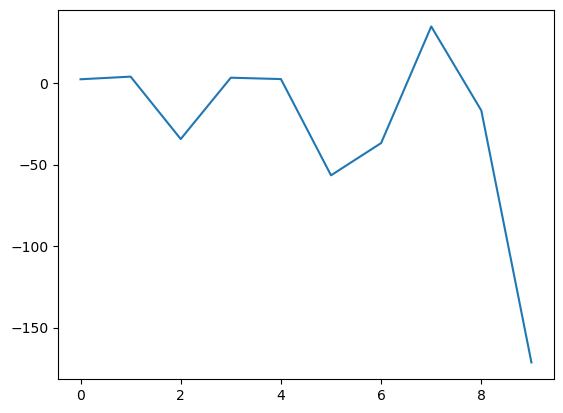

In [7]:
plt.plot(results['train_loss'])

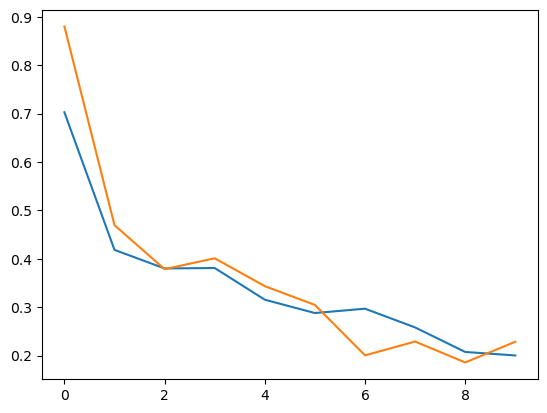

In [8]:
plt.plot(results['train_acc'])
plt.plot(results['test_acc'])

In [8]:
results

{'train_loss': [2.3165338609744497,
  3.8396158327645558,
  2.4879132283073284,
  11.283861305477105,
  -91.45278850462601,
  53.692327334332425,
  -22.03654208986286,
  38.07218942242524,
  -4.305532653651766,
  -17.839881746907515],
 'train_acc': [tensor(0.6993, dtype=torch.float64),
  tensor(0.3165, dtype=torch.float64),
  tensor(0.2655, dtype=torch.float64),
  tensor(0.2723, dtype=torch.float64),
  tensor(0.2033, dtype=torch.float64),
  tensor(0.1641, dtype=torch.float64),
  tensor(0.2090, dtype=torch.float64),
  tensor(0.1920, dtype=torch.float64),
  tensor(0.1663, dtype=torch.float64),
  tensor(0.1986, dtype=torch.float64)],
 'test_acc': [tensor(0.8399, dtype=torch.float64),
  tensor(0.3745, dtype=torch.float64),
  tensor(0.2669, dtype=torch.float64),
  tensor(0.2584, dtype=torch.float64),
  tensor(0.1771, dtype=torch.float64),
  tensor(0.1816, dtype=torch.float64),
  tensor(0.1933, dtype=torch.float64),
  tensor(0.1422, dtype=torch.float64),
  tensor(0.2028, dtype=torch.float64)